In [3]:
# 텐서플로가 윈도우 지원을 없애고 있대ㅠㅠ 나중에 리눅스..버전으로..예..
# 신경망의 깊이를 어떻게 줄지 등...
# 층 만들고 - 층 등록 - 학습할 방향 제시

In [5]:
from tensorflow import keras
# 딥러닝 라이브러리(tensorflw, PyTorch)

In [8]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# train = 6만개, test = 만개

In [12]:
train_input.shape # 자료 6만장, 가로 28, 세로 28

(60000, 28, 28)

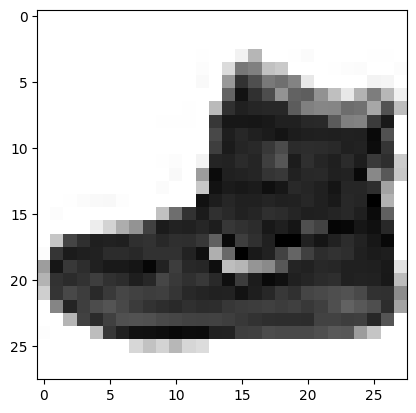

In [16]:
import matplotlib.pyplot as plt

plt.imshow(train_input[0], cmap='gray_r') # 데이터 확인 위해 첫번째 데이터만 흑백으로 뽑아오기

In [17]:
train_scaled = train_input / 255.0 # 0부터 225까지였는데 나눠주면 0과 1사이로 수들로 바뀜
train_scaled = train_scaled.reshape(-1, 28*28) # -1 = 6만개의 데이터는 그대로 쓰고 사이즈만 변경할 것이다

In [21]:
# 로지스틱 회귀
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(scores)

{'fit_time': array([11.48087382, 11.38971925, 11.43423104, 11.35830808,  6.95724845]), 'score_time': array([0.04968524, 0.04288864, 0.04626083, 0.04990101, 0.0310626 ]), 'test_score': array([0.81641667, 0.79641667, 0.81825   , 0.83108333, 0.819     ])}


In [22]:
import tensorflow as tf

In [24]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)
# 트레이닝 할 6만개의 데이터를 교차검증 하기 위해 다시 나누는 작업

In [25]:
# 출력층, 입력층
# 층이 여러개가 앞으로 여러개 쌓일 것임 = 딥러닝

In [31]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape=(784,))

# dense = 밀집층 # 784개의 데이터를 통해 10개의 뉴런을 만들어 줄거야!
# 10개로 분류할 것, activation = 활성화함수, 시그모이드함수(다중)
# 누가 제일 높아? = 소프트맥스 함수로 감싸주면 비율로 보여주기 때문에, 가장 높은 비율을 통해

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model = keras.Sequential([dense]) # dense를 리스트로 넣어줘야한대용
# dense층 딱 하나만 있는 모델을 우리가 만든 것

In [39]:
# 학습에 대한 기준점 주기, 만들어져 있는 모델을 쓰는 것이 아니기 때문
# 손실함수 정의
# 무엇을 기준으로 학습할래?, 정확도가 높은 방향으로 학습해줘
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 무엇을 기준으로 학습할래?, 정확도가 높은 방향으로 학습해줘

In [40]:
model.fit(train_scaled, train_target, epochs=5)
# accuracy = 한 번씩 돌면서 정확도 높아짐

Epoch 1/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7203 - loss: 0.8466
Epoch 2/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8273 - loss: 0.5046
Epoch 3/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8413 - loss: 0.4708
Epoch 4/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8478 - loss: 0.4421
Epoch 5/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8506 - loss: 0.4366


In [41]:
model.evaluate(val_scaled, val_target) # = scores
# 로지스틱 회귀보다는 점수가 좀 올라갔슈
# 앞 번호는 손실 정도

352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8579 - loss: 0.4378


[0.45221060514450073, 0.8522666692733765]